In [1]:
#import dependencies - first will look at dow jones industrial average index over same time as LDA analysis dataset
#8-8-2008 thru 7-1-2016
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import pandas_datareader as web

In [2]:
df = web.DataReader('DJIA', data_source='yahoo', start='2008-08-08', end='2016-07-01')
df["days"] = np.arange(len(df))
df

,High,Low,Open,Close,Volume,Adj Close,days
Date,,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312,0
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609,1
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727,2
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961,3
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688,4
...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17005.439453,17355.210938,17140.240234,5431220000,17140.240234,1984
2016-06-28,17453.929688,17174.960938,17190.509766,17409.720703,4385810000,17409.720703,1985
2016-06-29,17737.380859,17456.019531,17456.019531,17694.679688,4241740000,17694.679688,1986


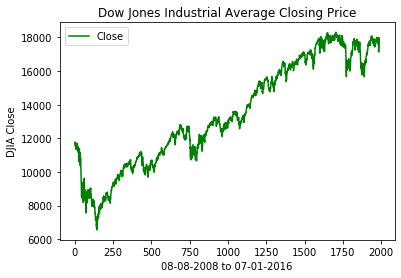

In [3]:
#plot the close to see what we're working with
x = list(df["days"])
y = list(df["Close"])
plt.plot(x, y, color="green", label="Close")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Close")
plt.title("Dow Jones Industrial Average Closing Price")
plt.legend()
plt.show()

In [4]:
#create some moving averages
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA30"] = df["Close"].rolling(window=30).mean()
df["SMA50"] = df["Close"].rolling(window=50).mean()
df["SMA100"] = df["Close"].rolling(window=100).mean()
df["SMA200"] = df["Close"].rolling(window=200).mean()

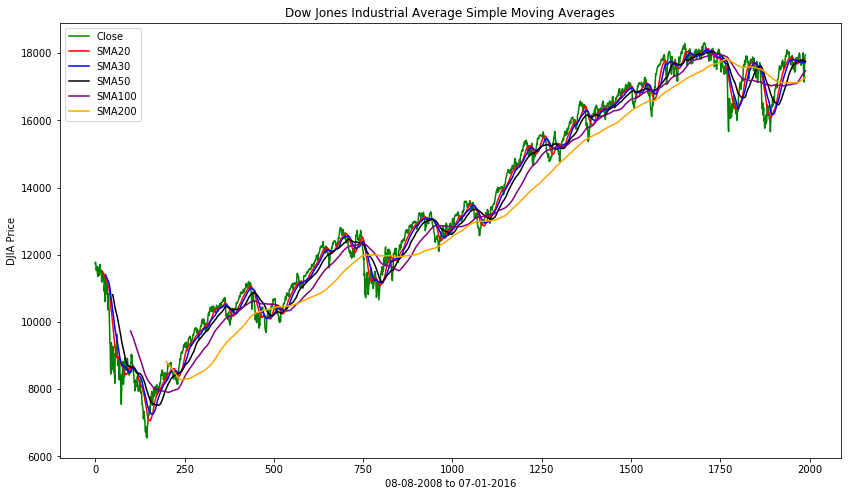

In [5]:
#plot all the moving averages because why not
x = list(df["days"])
y = list(df["Close"])
plt.figure(figsize=(14,8))
plt.plot(x, y, color="green", label="Close")
plt.plot(x, list(df["SMA20"]), color="red", label="SMA20")
plt.plot(x, list(df["SMA30"]), color="blue", label="SMA30")
plt.plot(x, list(df["SMA50"]), color="black", label="SMA50")
plt.plot(x, list(df["SMA100"]), color="purple", label="SMA100")
plt.plot(x, list(df["SMA200"]), color="orange", label="SMA200")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Price")
plt.title("Dow Jones Industrial Average Simple Moving Averages")
plt.legend()
plt.show()

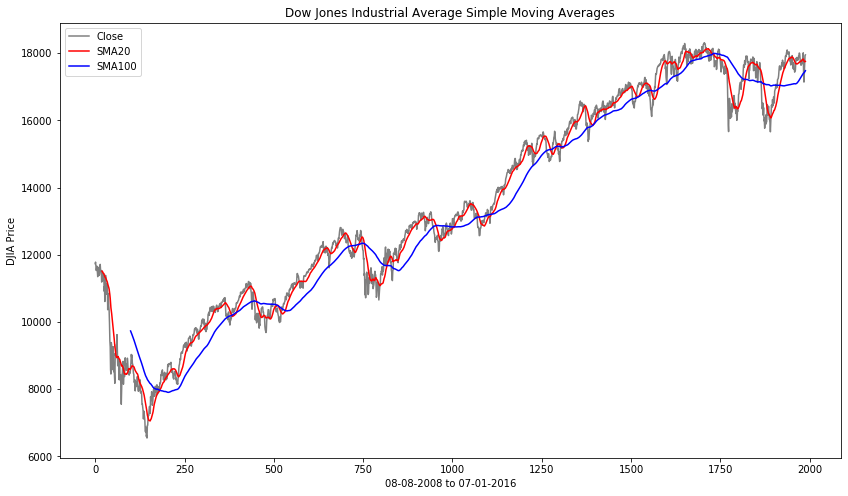

In [6]:
#do analysis on the 20-day and 100-day simple moving averages
x = list(df["days"])
y = list(df["Close"])
plt.figure(figsize=(14,8))
plt.plot(x, y, color="black", label="Close", alpha=.5)
plt.plot(x, list(df["SMA20"]), color="red", label="SMA20")
plt.plot(x, list(df["SMA100"]), color="blue", label="SMA100")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Price")
plt.title("Dow Jones Industrial Average Simple Moving Averages")
plt.legend()
plt.show()

In [21]:
#so what we're wondering is when the 20 day moves above the 100 day, that is a signal to buy, and vice versa sell. 
def buy_sell(data):
    buyPriceSignal = []
    sellPriceSignal = []
    flag = -1
    for i in range(len(data)):
        if data["SMA20"][i] > data["SMA100"][i]:
            if flag != 1:
                buyPriceSignal.append(data["Close"][i])
                sellPriceSignal.append(np.nan)
                flag = 1
            else:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(np.nan)
        elif data["SMA30"][i] < data["SMA100"][i]:
            if flag != 0:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(data["Close"][i])
                flag = 0
            else:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(np.nan)
        else:
            buyPriceSignal.append(np.nan)
            sellPriceSignal.append(np.nan)
    return(buyPriceSignal, sellPriceSignal)
    
    

In [8]:
buy_sell = buy_sell(df)
df["Buy_Signal_Price"] = buy_sell[0]
df["Sell_Signal_Price"] = buy_sell[1]


In [9]:
df

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17005.439453,17355.210938,17140.240234,5431220000,17140.240234,1984,17767.995020,17727.185026,17777.304648,17415.488350,17239.533599,NaN,NaN
2016-06-28,17453.929688,17174.960938,17190.509766,17409.720703,4385810000,17409.720703,1985,17749.121094,17717.152018,17765.415859,17425.419756,17244.416753,NaN,NaN
2016-06-29,17737.380859,17456.019531,17456.019531,17694.679688,4241740000,17694.679688,1986,17744.371582,17722.641992,17758.237461,17440.316855,17251.035352,NaN,NaN


/Users/adambilski/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


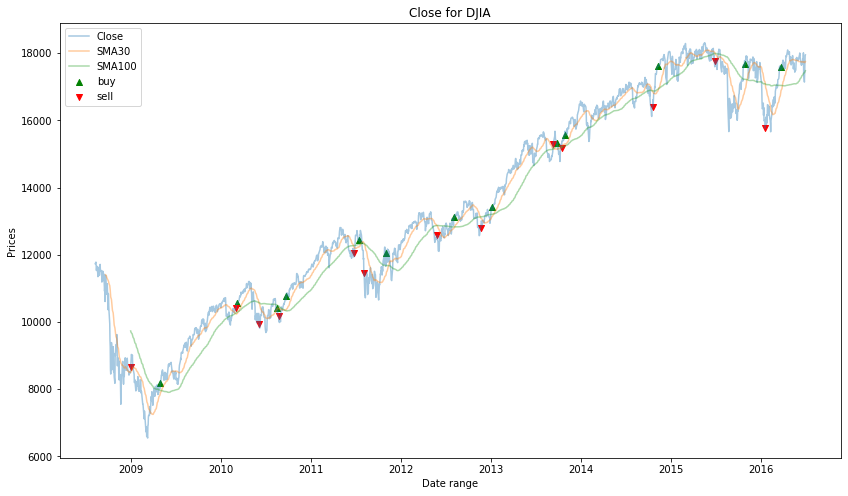

In [10]:
#visualize the data and strategy
plt.figure(figsize=(14,8))
plt.plot(df["Close"], label = "Close", alpha = .4)
plt.plot(df["SMA30"], label = "SMA30", alpha = .4)
plt.plot(df["SMA100"], label= "SMA100", alpha = .4)
plt.scatter(df.index, df["Buy_Signal_Price"], label="buy", marker="^", color="green")
plt.scatter(df.index, df["Sell_Signal_Price"], label="sell", marker="v", color="red")
plt.title("Close for DJIA")
plt.xlabel("Date range")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Will need to define a function to calculate the results. 
#The simplist way is to sum up the buy prices, and subtract from the sum of sell prices.
#With more time on this project, would look at drawdown analysis, max loss, max gain, portfolio values over time, etc.

In [11]:
#make dataframe we can convert to CSV and load into website - Javascript - plotly
df["Symbol"] = "DJIA"
df

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17005.439453,17355.210938,17140.240234,5431220000,17140.240234,1984,17767.995020,17727.185026,17777.304648,17415.488350,17239.533599,NaN,NaN,DJIA
2016-06-28,17453.929688,17174.960938,17190.509766,17409.720703,4385810000,17409.720703,1985,17749.121094,17717.152018,17765.415859,17425.419756,17244.416753,NaN,NaN,DJIA
2016-06-29,17737.380859,17456.019531,17456.019531,17694.679688,4241740000,17694.679688,1986,17744.371582,17722.641992,17758.237461,17440.316855,17251.035352,NaN,NaN,DJIA


In [14]:
aapl_df = web.DataReader('AAPL', data_source='yahoo', start='2008-08-08', end='2016-07-01')
aapl_df["days"] = np.arange(len(aapl_df))
#create some moving averages
aapl_df["SMA20"] = aapl_df["Close"].rolling(window=20).mean()
aapl_df["SMA30"] = aapl_df["Close"].rolling(window=30).mean()
aapl_df["SMA50"] = aapl_df["Close"].rolling(window=50).mean()
aapl_df["SMA100"] = aapl_df["Close"].rolling(window=100).mean()
aapl_df["SMA200"] = aapl_df["Close"].rolling(window=200).mean()
buy_sell = buy_sell(aapl_df)
aapl_df["Buy_Signal_Price"] = buy_sell[0]
aapl_df["Sell_Signal_Price"] = buy_sell[1]
aapl_df["Symbol"] = "AAPL"
aapl_df

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,24.235714,23.392857,23.408571,24.221428,178499300.0,20.968426,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
2008-08-11,25.214285,24.238571,24.295713,24.794285,222826100.0,21.464348,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
2008-08-12,25.612858,24.787144,24.788572,25.247143,209069700.0,21.856388,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
2008-08-13,25.714285,25.128571,25.425714,25.614286,210586600.0,22.174221,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
2008-08-14,25.778572,25.405714,25.475714,25.617144,177825200.0,22.176693,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,93.050003,91.500000,93.000000,92.040001,45489600.0,86.561737,1984,97.0980,96.934000,97.3112,99.9964,105.33115,NaN,NaN,AAPL
2016-06-28,93.660004,92.139999,92.900002,93.589996,40444900.0,88.019493,1985,96.7845,96.924333,97.0334,99.9663,105.22805,NaN,NaN,AAPL
2016-06-29,94.550003,93.629997,93.970001,94.400002,36531000.0,88.781273,1986,96.5815,96.954667,96.7832,99.9701,105.12350,NaN,NaN,AAPL


In [16]:
mmmdf = web.DataReader('MMM', data_source='yahoo', start='2008-08-08', end='2016-07-01')
mmmdf["days"] = np.arange(len(mmmdf))
#create some moving averages
mmmdf["SMA20"] = mmmdf["Close"].rolling(window=20).mean()
mmmdf["SMA30"] = mmmdf["Close"].rolling(window=30).mean()
mmmdf["SMA50"] = mmmdf["Close"].rolling(window=50).mean()
mmmdf["SMA100"] = mmmdf["Close"].rolling(window=100).mean()
mmmdf["SMA200"] = mmmdf["Close"].rolling(window=200).mean()
buy_sell = buy_sell(mmmdf)
mmmdf["Buy_Signal_Price"] = buy_sell[0]
mmmdf["Sell_Signal_Price"] = buy_sell[1]
mmmdf["Symbol"] = "MMM"
mmmdf

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,73.910004,71.139999,71.139999,73.480003,5424900.0,53.564968,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2008-08-11,74.680000,73.180000,73.190002,74.379997,5461500.0,54.221046,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2008-08-12,74.540001,73.379997,74.540001,73.599998,4087600.0,53.652439,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2008-08-13,73.940002,72.199997,73.489998,72.959999,3847600.0,53.185894,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2008-08-14,73.870003,72.209999,72.550003,73.040001,2992100.0,53.244217,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,167.830002,165.160004,167.779999,167.190002,2544100.0,150.653091,1984,169.509500,168.900667,168.726601,164.998501,157.268951,NaN,NaN,MMM
2016-06-28,169.669998,167.960007,168.139999,169.589996,2237300.0,152.815659,1985,169.573000,168.902000,168.727401,165.160000,157.410601,NaN,NaN,MMM
2016-06-29,171.850006,170.360001,171.020004,171.520004,1894100.0,154.554794,1986,169.714500,169.025667,168.764801,165.340500,157.564151,NaN,NaN,MMM


In [18]:
axpdf = web.DataReader('AXP', data_source='yahoo', start='2008-08-08', end='2016-07-01')
axpdf["days"] = np.arange(len(axpdf))
#create some moving averages
axpdf["SMA20"] = axpdf["Close"].rolling(window=20).mean()
axpdf["SMA30"] = axpdf["Close"].rolling(window=30).mean()
axpdf["SMA50"] = axpdf["Close"].rolling(window=50).mean()
axpdf["SMA100"] = axpdf["Close"].rolling(window=100).mean()
axpdf["SMA200"] = axpdf["Close"].rolling(window=200).mean()
buy_sell = buy_sell(axpdf)
axpdf["Buy_Signal_Price"] = buy_sell[0]
axpdf["Sell_Signal_Price"] = buy_sell[1]
axpdf["Symbol"] = "AXP"
axpdf

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,38.310001,36.060001,36.330002,37.810001,15760600.0,31.017950,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXP
2008-08-11,40.169998,37.500000,37.759998,39.169998,11970000.0,32.133644,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXP
2008-08-12,39.040001,37.680000,38.889999,38.049999,13758100.0,31.214848,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXP
2008-08-13,37.869999,36.259998,37.869999,36.889999,13990100.0,30.263214,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXP
2008-08-14,38.400002,36.509998,36.660000,38.200001,11987100.0,31.337887,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,59.340000,57.330002,59.340000,57.669998,7567600.0,54.093266,1984,63.4905,63.711334,64.1710,61.0410,65.68690,NaN,NaN,AXP
2016-06-28,58.610001,57.150002,58.250000,57.900002,8294300.0,54.308998,1985,63.0975,63.505667,64.0772,61.0762,65.59890,NaN,NaN,AXP
2016-06-29,59.700001,57.860001,57.950001,59.630001,6281100.0,56.213253,1986,62.7835,63.401334,63.9984,61.1327,65.52135,NaN,NaN,AXP


In [20]:
badf = web.DataReader('BA', data_source='yahoo', start='2008-08-08', end='2016-07-01')
badf["days"] = np.arange(len(badf))
#create some moving averages
badf["SMA20"] = badf["Close"].rolling(window=20).mean()
badf["SMA30"] = badf["Close"].rolling(window=30).mean()
badf["SMA50"] = badf["Close"].rolling(window=50).mean()
badf["SMA100"] = badf["Close"].rolling(window=100).mean()
badf["SMA200"] = badf["Close"].rolling(window=200).mean()
buy_sell = buy_sell(badf)
badf["Buy_Signal_Price"] = buy_sell[0]
badf["Sell_Signal_Price"] = buy_sell[1]
badf["Symbol"] = "BA"
badf

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,68.750000,64.309998,64.870003,67.860001,10088400.0,50.133427,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
2008-08-11,67.900002,66.209999,67.889999,66.620003,6875200.0,49.217339,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
2008-08-12,66.949997,65.570000,66.889999,65.930000,6422200.0,48.707588,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
2008-08-13,66.230003,64.000000,66.070000,64.260002,8990000.0,47.473831,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
2008-08-14,65.430000,63.450001,63.740002,64.769997,9356600.0,47.850609,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,125.750000,122.349998,125.680000,122.699997,6169000.0,111.107422,1984,129.8220,129.735667,130.976801,127.3969,133.08060,NaN,NaN,BA
2016-06-28,124.760002,122.699997,124.500000,123.889999,4438100.0,112.184982,1985,129.7090,129.394000,130.815201,127.3997,133.02670,NaN,NaN,BA
2016-06-29,127.320000,124.160004,125.489998,126.989998,4916700.0,114.992111,1986,129.7380,129.208334,130.701401,127.4440,132.98950,NaN,NaN,BA


In [22]:
catdf = web.DataReader('CAT', data_source='yahoo', start='2008-08-08', end='2016-07-01')
catdf["days"] = np.arange(len(catdf))
#create some moving averages
catdf["SMA20"] = catdf["Close"].rolling(window=20).mean()
catdf["SMA30"] = catdf["Close"].rolling(window=30).mean()
catdf["SMA50"] = catdf["Close"].rolling(window=50).mean()
catdf["SMA100"] = catdf["Close"].rolling(window=100).mean()
catdf["SMA200"] = catdf["Close"].rolling(window=200).mean()
buy_sell = buy_sell(catdf)
catdf["Buy_Signal_Price"] = buy_sell[0]
catdf["Sell_Signal_Price"] = buy_sell[1]
catdf["Symbol"] = "CAT"
catdf

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,71.940002,68.389999,69.120003,70.900002,6544300.0,49.315464,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAT
2008-08-11,71.370003,70.050003,70.629997,70.800003,3746900.0,49.245907,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAT
2008-08-12,72.080002,70.440002,70.790001,71.809998,5705300.0,49.948437,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAT
2008-08-13,70.050003,67.720001,69.559998,69.830002,9399200.0,48.571194,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAT
2008-08-14,71.360001,68.260002,68.930000,70.290001,5671200.0,48.891155,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,72.709999,70.529999,72.500000,71.379997,7337400.0,63.673550,1984,75.3015,73.859000,74.6560,73.0494,70.58825,NaN,NaN,CAT
2016-06-28,72.900002,71.510002,72.239998,72.519997,4743700.0,64.690460,1985,75.3020,73.919667,74.5214,73.1150,70.58770,NaN,NaN,CAT
2016-06-29,74.400002,72.790001,73.250000,74.230003,4015400.0,66.215866,1986,75.4000,74.025667,74.3982,73.1961,70.59500,NaN,NaN,CAT


In [23]:
first5andDJIA = pd.concat([df,aapl_df,mmmdf,axpdf,badf,catdf], ignore_index=False)
first5andDJIA

,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
Date,,,,,,,,,,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4.966810e+09,11734.320312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5.067310e+09,11782.349609,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4.711290e+09,11642.469727,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4.787600e+09,11532.959961,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4.064000e+09,11615.929688,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,72.709999,70.529999,72.500000,71.379997,7.337400e+06,63.673550,1984,75.3015,73.859000,74.6560,73.0494,70.58825,NaN,NaN,CAT
2016-06-28,72.900002,71.510002,72.239998,72.519997,4.743700e+06,64.690460,1985,75.3020,73.919667,74.5214,73.1150,70.58770,NaN,NaN,CAT
2016-06-29,74.400002,72.790001,73.250000,74.230003,4.015400e+06,66.215866,1986,75.4000,74.025667,74.3982,73.1961,70.59500,NaN,NaN,CAT


In [24]:
first5andDJIA.to_csv("5DowCompanies_DJIA.csv")